In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

dataset=pd.read_csv('gld_price_data.csv')
dataset.head()
# dataset.describe()
# dataset.info()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [69]:
x=dataset.drop(['Date','GLD'],axis=1)
print(x.shape)
y=dataset['GLD']

# from sklearn.preprocessing import StandardScaler
# st_x=StandardScaler()
# dataset.iloc[:,1:]=st_x.fit_transform(dataset.iloc[:,1:])
# print(dataset)
print(y.shape)

(2290, 4)
           Date       SPX       GLD       USO       SLV   EUR/USD
0      1/2/2008 -0.399145 -1.626963  2.388810 -0.691720  1.429753
1      1/3/2008 -0.399145 -1.596463  2.383687 -0.676912  1.451035
2      1/4/2008 -0.467604 -1.615365  2.329381 -0.693553  1.458646
3      1/7/2008 -0.458837 -1.630830  2.236652 -0.709630  1.403954
4      1/8/2008 -0.508915 -1.544483  2.265342 -0.633900  2.079145
...         ...       ...       ...       ...       ...       ...
2285   5/8/2018  1.960708  0.079779 -0.911009 -0.645182 -0.736505
2286   5/9/2018  2.010555  0.068610 -0.895128 -0.642361 -0.752222
2287  5/10/2018  2.059264  0.105125 -0.893078 -0.612747 -0.698761
2288  5/14/2018  2.072867  0.075483 -0.894615 -0.638131 -0.688383
2289  5/16/2018  2.064486 -0.008122 -0.893293 -0.653051 -0.772667

[2290 rows x 6 columns]
(2290,)


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]
              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090

<AxesSubplot:>

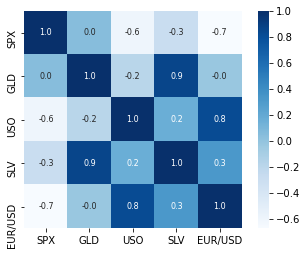

In [78]:
correlation = dataset.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [79]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [72]:
from sklearn import metrics
score=metrics.r2_score(y_train,regressor.predict(x_train))
print(score)

0.998335249769308


In [73]:
score =metrics.r2_score(y_test,regressor.predict(x_test))
print(score)

0.9888390410055039


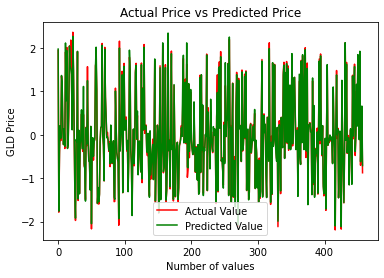

In [83]:
y_test = list(y_test)
plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(regressor.predict(x_test), color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()